In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import Assignment as a
K = 3
MAX_ITER = 2000

## Plotting function

In [46]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,10)

def PlotResults(X,r,num_graphs=4,algos=["K-Means", "Mixture of Gaussians", "Birch", "t-SNE with K-Means"],xaxis="xaxis",yaxis="yaxis",fontsize='13'):
    '''
    Plots cluster results
        Parameters:
            X[2xN Matrix]: 2xN Matrix of Datapoints to be plotted
            r[?xN Matrix]: NumClusteringAlgorithmsxN Matrix of Datapoint Assignments from the Clustering Algorithms.
            algos[? indexed array of strings]: Titles for each of the plots based on the clustering algorithms presented.
            xaxis[string]: Label for the x axis
            yaxis[string]: Label for the x axis
        Returns:
            Plotted results of clustering algorithms in 2x[NumclusteringAlgorithms/2] subplot figure with different colors for each cluster
    '''
    
    col = num_graphs
    rows = int(np.ceil(len(r)/col))
    
    K = len(np.unique(r[0]))
    
    fig, axs = plt.subplots(rows, col, figsize=(6*col,5*rows), sharex=True, sharey=True)

    
    for i in range(len(axs)):
        axs[i].set_title(algos[i], fontsize=fontsize)
    
    COLORS = ['r','g','b','m','c','y','k']
    
    for i in range(len(r)):
        colors = None
        colors = np.where(r[i]==0,COLORS[0],'-')
        for k in range(K-1):
            colors[r[i]==k+1] = COLORS[k+1]
        if(rows>1):
            axs[int(i/col),i%col].scatter(X[0], X[1], c=colors)
        else:
            axs[i].scatter(X[0], X[1], c=colors)
    
    # Create common X and Y axis
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)

    plt.xlabel(xaxis, fontsize=fontsize)
    plt.ylabel(yaxis, fontsize=fontsize)

## Import preprocessed data locally

In [35]:
data = pd.read_csv("data/ripa_preprocessed.csv", low_memory=False)

In [2]:
data.head()

,stop_id,beat,isschool,date_stop,time_stop,stopduration,stop_in_response_to_cfs,officer_assignment_key,exp_years,pid,...,assignment_F,assignment_G,assignment_H,assignment_I,assignment_J,timestamp,year,month,day,weekday
0,2443,122,0,2018-07-01,00:01:37,30,0,1,10,1,...,0.0,0.0,0.0,0.0,0.0,2018-07-01 00:01:37,2018,7,1,6
1,2444,121,0,2018-07-01,00:03:34,10,0,1,18,1,...,0.0,0.0,0.0,0.0,0.0,2018-07-01 00:03:34,2018,7,1,6
2,2447,822,0,2018-07-01,00:05:43,15,1,10,1,1,...,0.0,0.0,0.0,0.0,1.0,2018-07-01 00:05:43,2018,7,1,6
3,2447,822,0,2018-07-01,00:05:43,15,1,10,1,2,...,0.0,0.0,0.0,0.0,1.0,2018-07-01 00:05:43,2018,7,1,6
4,2448,614,0,2018-07-01,00:19:06,5,0,1,3,1,...,0.0,0.0,0.0,0.0,0.0,2018-07-01 00:19:06,2018,7,1,6


In [3]:
# get only numerical and relevant data for analysis
data = data.drop(['date_stop', 'time_stop', 'timestamp', 'stop_id', 'pid'], axis=1)

In [4]:
# data before normalizing
data.head()

,beat,isschool,stopduration,stop_in_response_to_cfs,officer_assignment_key,exp_years,isstudent,perceived_limited_english,perceived_age,gender_female,...,assignment_E,assignment_F,assignment_G,assignment_H,assignment_I,assignment_J,year,month,day,weekday
0,122,0,30,0,1,10,0,0,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,7,1,6
1,121,0,10,0,1,18,0,0,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,7,1,6
2,822,0,15,1,10,1,0,0,30,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2018,7,1,6
3,822,0,15,1,10,1,0,0,30,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2018,7,1,6
4,614,0,5,0,1,3,0,0,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,7,1,6


## Apply algorithms on unnormalized data

In [7]:
# apply assignment function (K-means, Gaussian Mixture Model, Birch)
%%time
results = a.AssignmentFunction(np.array((data.exp_years, data.officer_assignment_key)).T, K, MAX_ITER)

Fitting Kmeans
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
Converged!
Fitting MOG
Fitting Birch
CPU times: user 1min 43s, sys: 1.44 s, total: 1min 44s
Wall time: 1min 36s


In [8]:
# apply t-sne algorithm to reduce dimensionality
%%time
reduced_data = TSNE(n_components=2, verbose=2).fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 464044 samples in 0.006s...
[t-SNE] Computed neighbors for 464044 samples in 4298.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 464044
[t-SNE] Computed conditional probabilities for sample 2000 / 464044
[t-SNE] Computed conditional probabilities for sample 3000 / 464044
[t-SNE] Computed conditional probabilities for sample 4000 / 464044
[t-SNE] Computed conditional probabilities for sample 5000 / 464044
[t-SNE] Computed conditional probabilities for sample 6000 / 464044
[t-SNE] Computed conditional probabilities for sample 7000 / 464044
[t-SNE] Computed conditional probabilities for sample 8000 / 464044
[t-SNE] Computed conditional probabilities for sample 9000 / 464044
[t-SNE] Computed conditional probabilities for sample 10000 / 464044
[t-SNE] Computed conditional probabilities for sample 11000 / 464044
[t-SNE] Computed conditional probabilities for sample 12000 / 464044
[t-SNE] Computed conditional prob

In [9]:
# K-means to cluster using t-sne reduced data
tsneResults = KMeans(n_clusters=3, max_iter=MAX_ITER, verbose=2).fit_predict(reduced_data)

Initialization complete
Iteration 0, inertia 124362624.0
Iteration 1, inertia 96693248.0
Iteration 2, inertia 92968336.0
Iteration 3, inertia 92088592.0
Iteration 4, inertia 91874424.0
Iteration 5, inertia 91792440.0
Iteration 6, inertia 91774840.0
Iteration 7, inertia 91765680.0
Iteration 8, inertia 91761448.0
Converged at iteration 8: center shift 0.022924024611711502 within tolerance 0.023809500122070313.
Initialization complete
Iteration 0, inertia 116610696.0
Iteration 1, inertia 92863640.0
Iteration 2, inertia 92215480.0
Iteration 3, inertia 92064464.0
Iteration 4, inertia 92023504.0
Iteration 5, inertia 92011576.0
Iteration 6, inertia 92000680.0
Iteration 7, inertia 91988712.0
Iteration 8, inertia 91980128.0
Iteration 9, inertia 91969768.0
Converged at iteration 9: center shift 0.020363332703709602 within tolerance 0.023809500122070313.
Initialization complete
Iteration 0, inertia 103904712.0
Iteration 1, inertia 92776992.0
Iteration 2, inertia 92262760.0
Iteration 3, inertia 92

In [10]:
final_results = np.vstack((results, tsneResults))
final_results.shape

(4, 464044)

In [17]:
# uncomment to save tsne-reduced data locally
# pd.DataFrame(reduced_data).to_csv("data/tsne_exp_key.csv", index=False)
# pd.DataFrame(tsneResults).to_csv("data/tsneK_exp_key.csv", index=False)
# pd.DataFrame(final_results).to_csv("data/merged_exp_key.csv", index=False)

## Apply algorithms on normalized data

In [21]:
# normalize data using MinMaxScaler
norm_data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)

In [22]:
norm_data.head()

,beat,isschool,stopduration,stop_in_response_to_cfs,officer_assignment_key,exp_years,isstudent,perceived_limited_english,perceived_age,gender_female,...,assignment_E,assignment_F,assignment_G,assignment_H,assignment_I,assignment_J,year,month,day,weekday
0,0.012387,0.0,0.020153,0.0,0.0,0.183673,0.0,0.0,0.201681,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,1.0
1,0.011261,0.0,0.006254,0.0,0.0,0.346939,0.0,0.0,0.201681,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,1.0
2,0.800676,0.0,0.009729,1.0,1.0,0.000000,0.0,0.0,0.243697,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545455,0.0,1.0
3,0.800676,0.0,0.009729,1.0,1.0,0.000000,0.0,0.0,0.243697,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545455,0.0,1.0
4,0.566441,0.0,0.002780,0.0,0.0,0.040816,0.0,0.0,0.184874,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,1.0


In [23]:
# apply assignment function (K-means, Gaussian Mixture Model, Birch)
norm_results = a.AssignmentFunction(np.array((norm_data.exp_years, norm_data.officer_assignment_key)).T, K, MAX_ITER)

Fitting Kmeans
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
Converged!
Fitting MOG
Fitting Birch


/Users/kevinnguyen/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:647: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  warnings.warn(


In [24]:
# apply t-sne algorithm to reduce dimensionality
%%time
norm_reduced_data = TSNE(n_components=2, verbose=2).fit_transform(norm_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 464044 samples in 0.007s...
[t-SNE] Computed neighbors for 464044 samples in 5961.867s...
[t-SNE] Computed conditional probabilities for sample 1000 / 464044
[t-SNE] Computed conditional probabilities for sample 2000 / 464044
[t-SNE] Computed conditional probabilities for sample 3000 / 464044
[t-SNE] Computed conditional probabilities for sample 4000 / 464044
[t-SNE] Computed conditional probabilities for sample 5000 / 464044
[t-SNE] Computed conditional probabilities for sample 6000 / 464044
[t-SNE] Computed conditional probabilities for sample 7000 / 464044
[t-SNE] Computed conditional probabilities for sample 8000 / 464044
[t-SNE] Computed conditional probabilities for sample 9000 / 464044
[t-SNE] Computed conditional probabilities for sample 10000 / 464044
[t-SNE] Computed conditional probabilities for sample 11000 / 464044
[t-SNE] Computed conditional probabilities for sample 12000 / 464044
[t-SNE] Computed conditional prob

In [25]:
# K-means to cluster using t-sne reduced data
norm_tsneResults = KMeans(n_clusters=3, max_iter=MAX_ITER, verbose=2).fit_predict(norm_reduced_data)

Initialization complete
Iteration 0, inertia 129040736.0
Iteration 1, inertia 102817200.0
Iteration 2, inertia 99626784.0
Iteration 3, inertia 98811896.0
Iteration 4, inertia 98578568.0
Iteration 5, inertia 98516496.0
Iteration 6, inertia 98515440.0
Converged at iteration 6: center shift 0.00899050198495388 within tolerance 0.025601004028320315.
Initialization complete
Iteration 0, inertia 126922272.0
Iteration 1, inertia 101222192.0
Iteration 2, inertia 99034456.0
Iteration 3, inertia 98654056.0
Iteration 4, inertia 98571592.0
Iteration 5, inertia 98532392.0
Iteration 6, inertia 98519648.0
Converged at iteration 6: center shift 0.018176594749093056 within tolerance 0.025601004028320315.
Initialization complete
Iteration 0, inertia 132087064.0
Iteration 1, inertia 106970120.0
Iteration 2, inertia 100936344.0
Iteration 3, inertia 99475200.0
Iteration 4, inertia 99100208.0
Iteration 5, inertia 98991848.0
Iteration 6, inertia 98972248.0
Converged at iteration 6: center shift 0.02333970740

In [26]:
norm_final_results = np.vstack((norm_results, norm_tsneResults))
norm_final_results.shape

(4, 464044)

In [27]:
# uncomment to save normalized tsne-reduced data locally
# pd.DataFrame(norm_reduced_data).to_csv("data/tsne_exp_key_norm.csv", index=False)
# pd.DataFrame(norm_tsneResults).to_csv("data/tsneK_exp_key_norm.csv", index=False)
# pd.DataFrame(norm_final_results).to_csv("data/merged_exp_key_norm.csv", index=False)

## Plotting

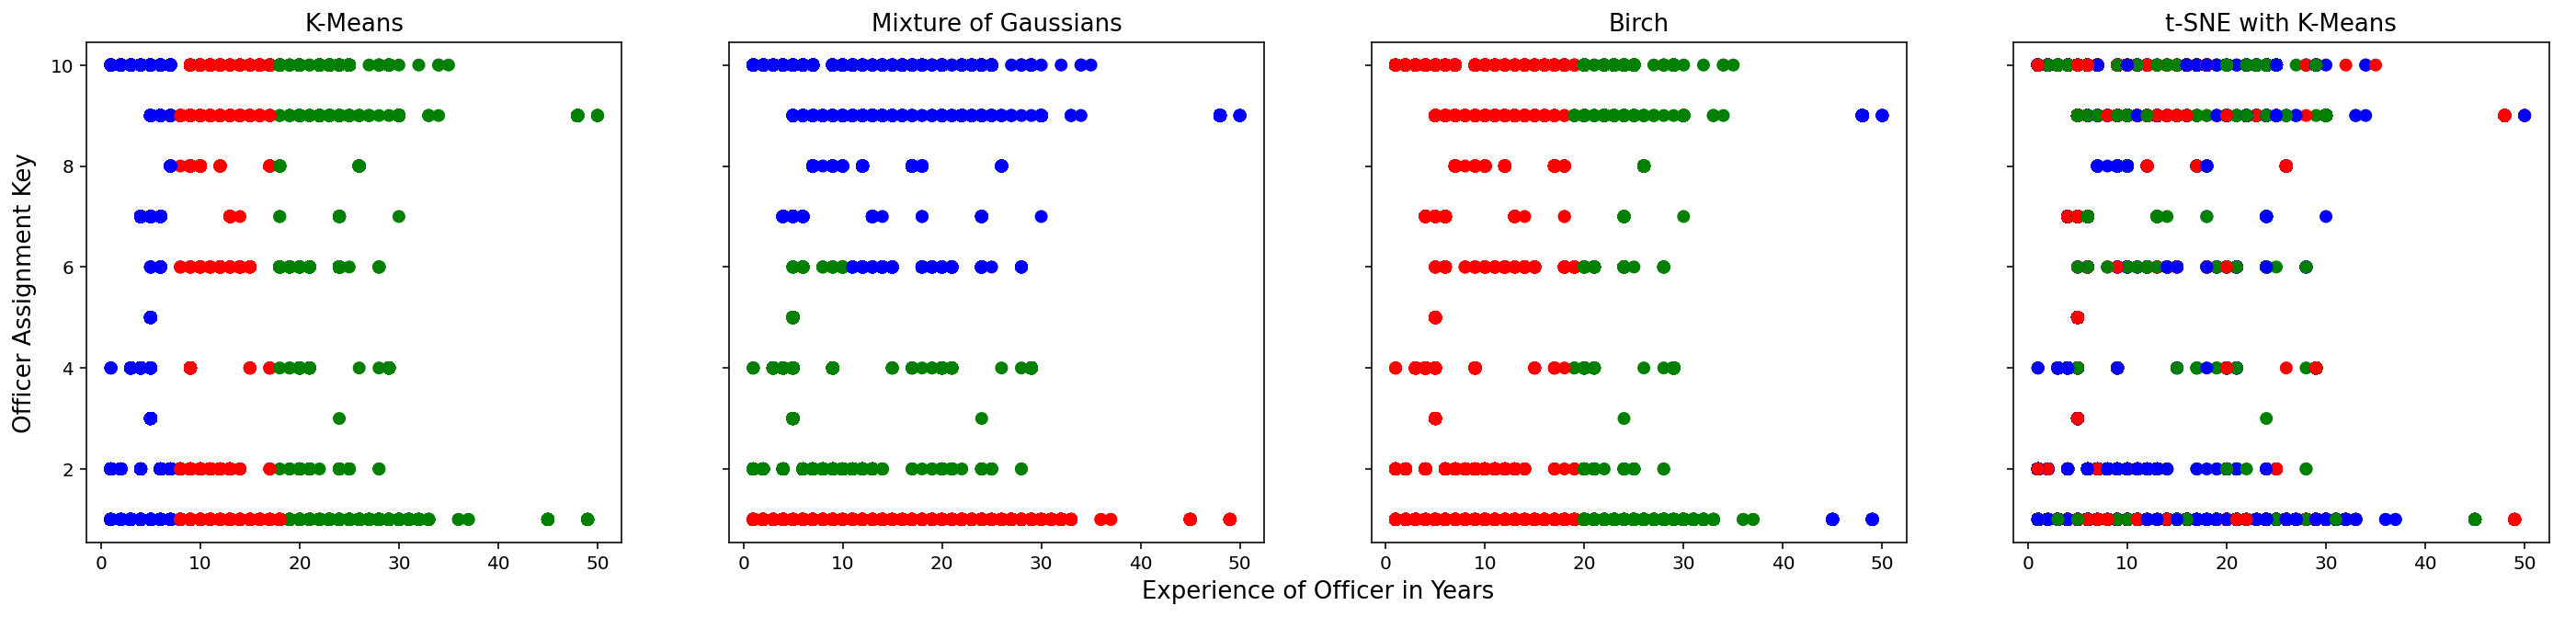

In [36]:
# plot unnormalized data clusters
PlotResults(X=np.array((data.exp_years, data.officer_assignment_key)), 
            r=final_results, 
            xaxis="Experience of Officer in Years", 
            yaxis="Officer Assignment Key")

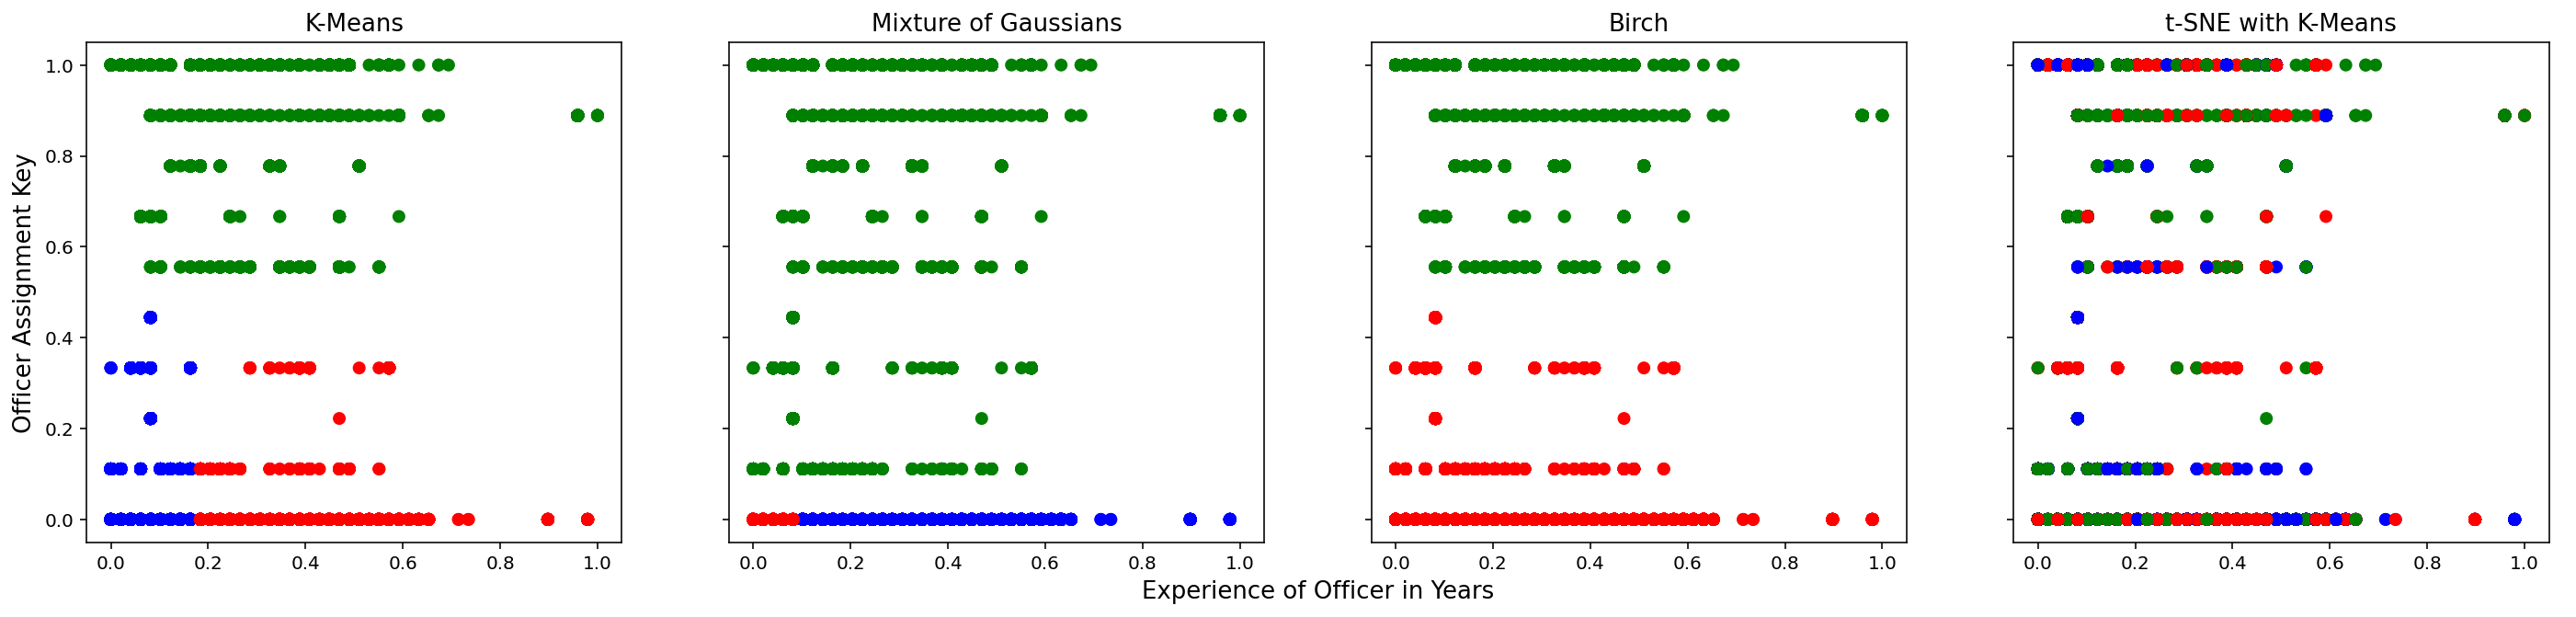

In [38]:
# plot normalized data clusters
PlotResults(X=np.array((norm_data.exp_years, norm_data.officer_assignment_key)),
            r=norm_final_results, 
            xaxis="Experience of Officer in Years", 
            yaxis="Officer Assignment Key")

## Run K-Means, GMM and Birch on t-SNE reduced data

In [75]:
%%time
reduced_results = a.AssignmentFunction(np.array((reduced_data[:, 0], reduced_data[:, 1])).T, K, MAX_ITER)

Fitting Kmeans
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
iter:  11
iter:  12
iter:  13
iter:  14
iter:  15
iter:  16
iter:  17
iter:  18
iter:  19
iter:  20
iter:  21
iter:  22
iter:  23
iter:  24
iter:  25
iter:  26
iter:  27
iter:  28
iter:  29
iter:  30
iter:  31
iter:  32
iter:  33
iter:  34
iter:  35
iter:  36
iter:  37
iter:  38
iter:  39
iter:  40
iter:  41
iter:  42
iter:  43
iter:  44
iter:  45
iter:  46
Converged!
Fitting MOG
Fitting Birch
CPU times: user 9min 59s, sys: 18.7 s, total: 10min 17s
Wall time: 9min 52s


In [76]:
norm_reduced_results = a.AssignmentFunction(np.array((norm_reduced_data[:, 0], norm_reduced_data[:, 1])).T, K, MAX_ITER)

Fitting Kmeans
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
iter:  11
iter:  12
iter:  13
iter:  14
iter:  15
iter:  16
iter:  17
iter:  18
iter:  19
iter:  20
iter:  21
iter:  22
iter:  23
iter:  24
iter:  25
iter:  26
iter:  27
iter:  28
iter:  29
iter:  30
iter:  31
iter:  32
iter:  33
Converged!
Fitting MOG
Fitting Birch


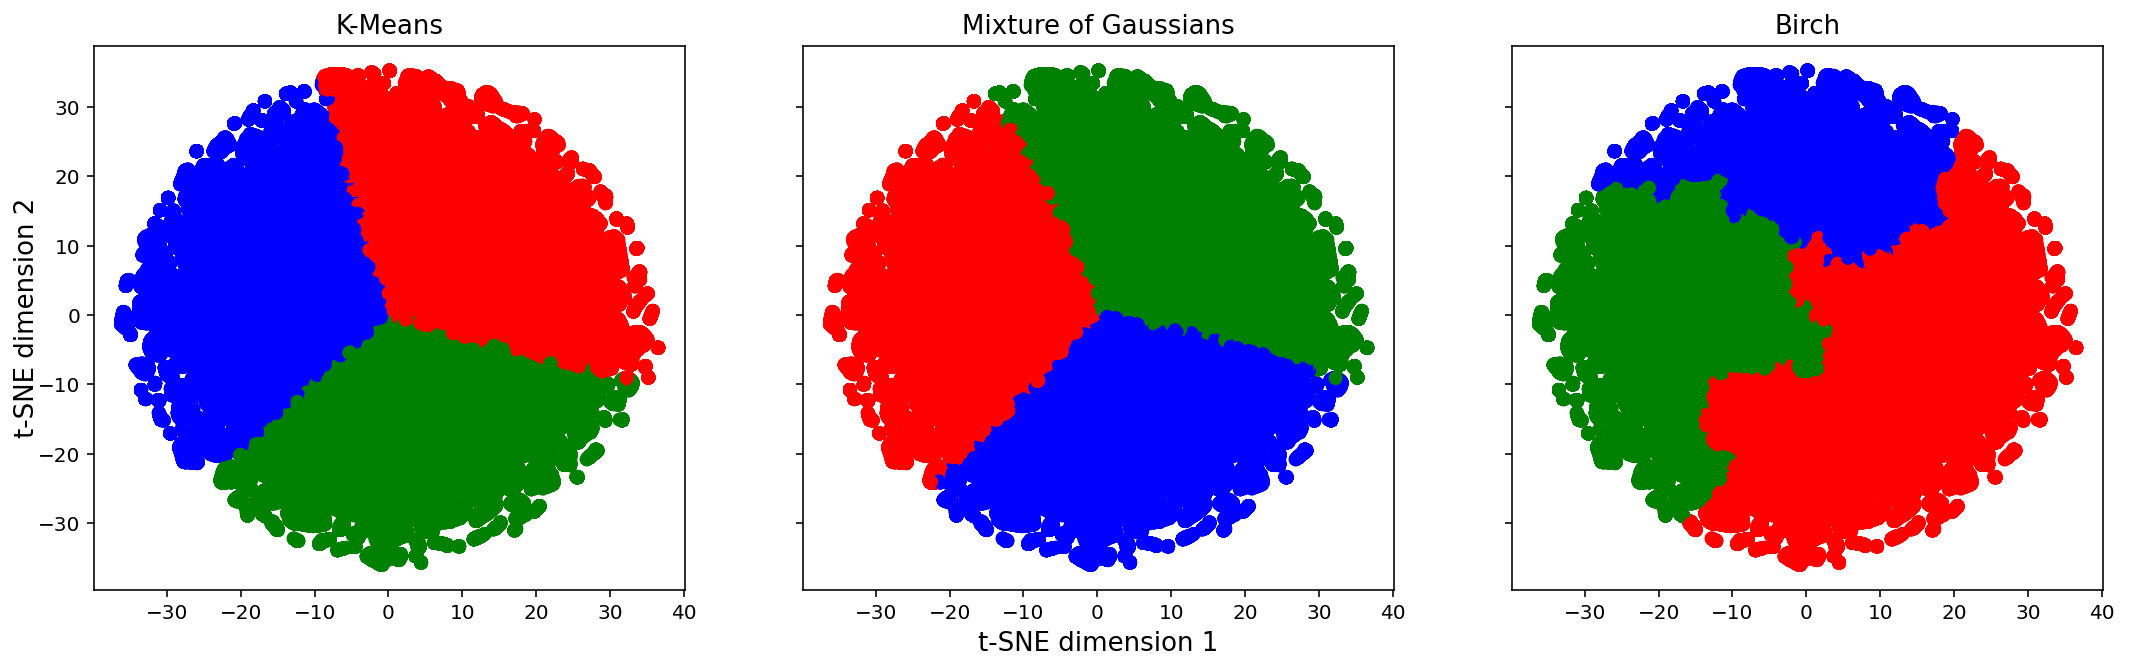

In [84]:
PlotResults(X=np.array((reduced_data[:, 0], reduced_data[:, 1])), 
            r=reduced_results, 
            num_graphs=3, 
            xaxis="t-SNE dimension 1", 
            yaxis="t-SNE dimension 2")

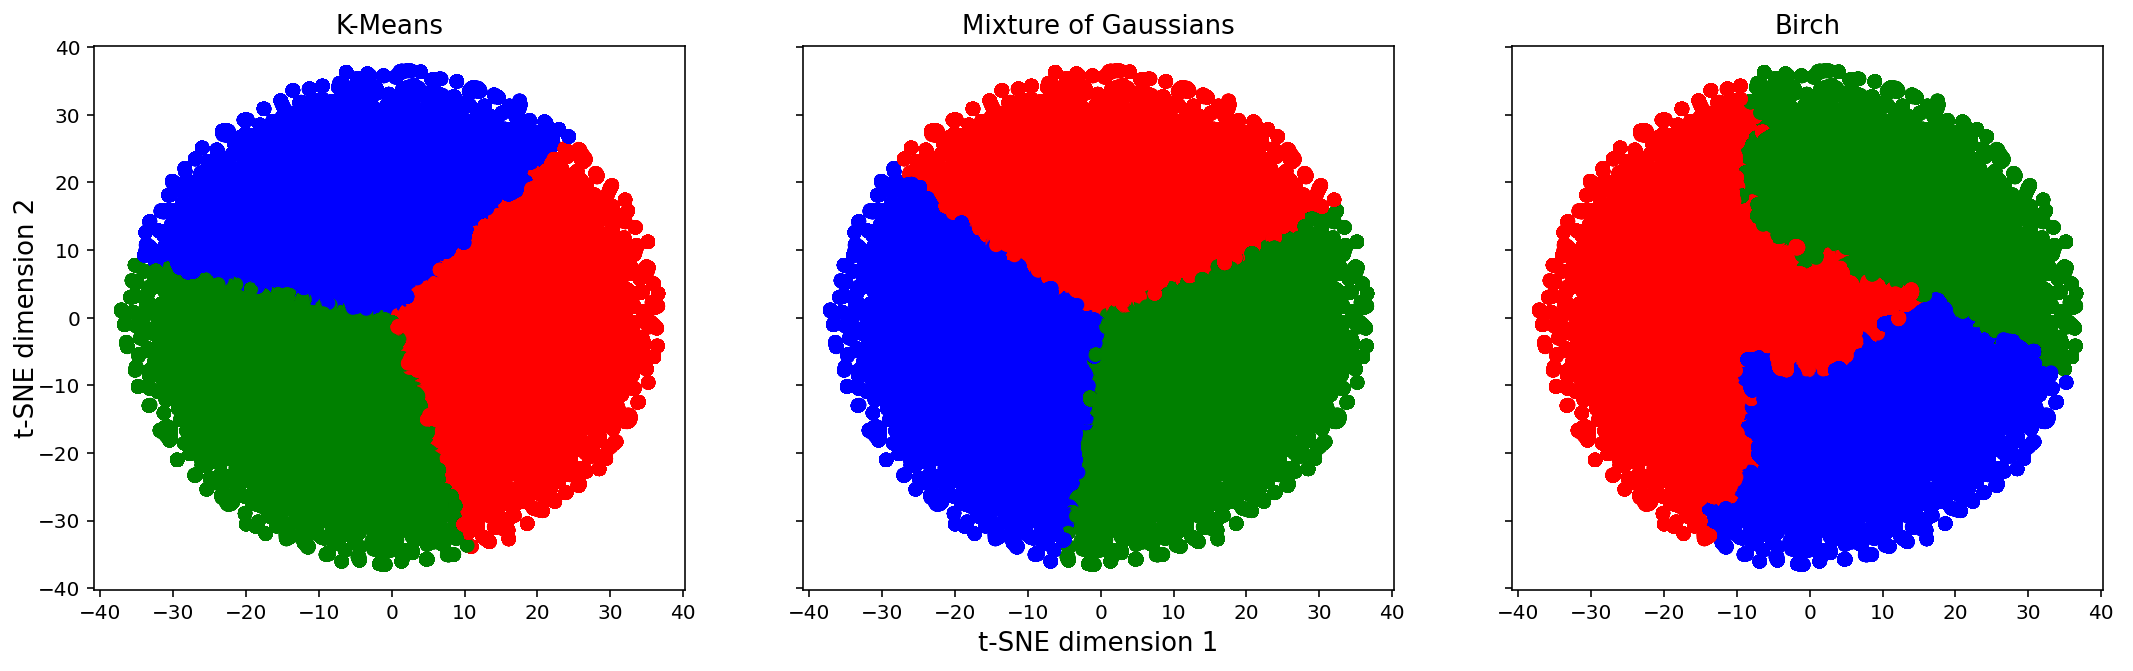

In [88]:
PlotResults(X=np.array((norm_reduced_data[:, 0], norm_reduced_data[:, 1])), 
            r=norm_reduced_results, 
            num_graphs=3, 
            xaxis="t-SNE dimension 1", 
            yaxis="t-SNE dimension 2")

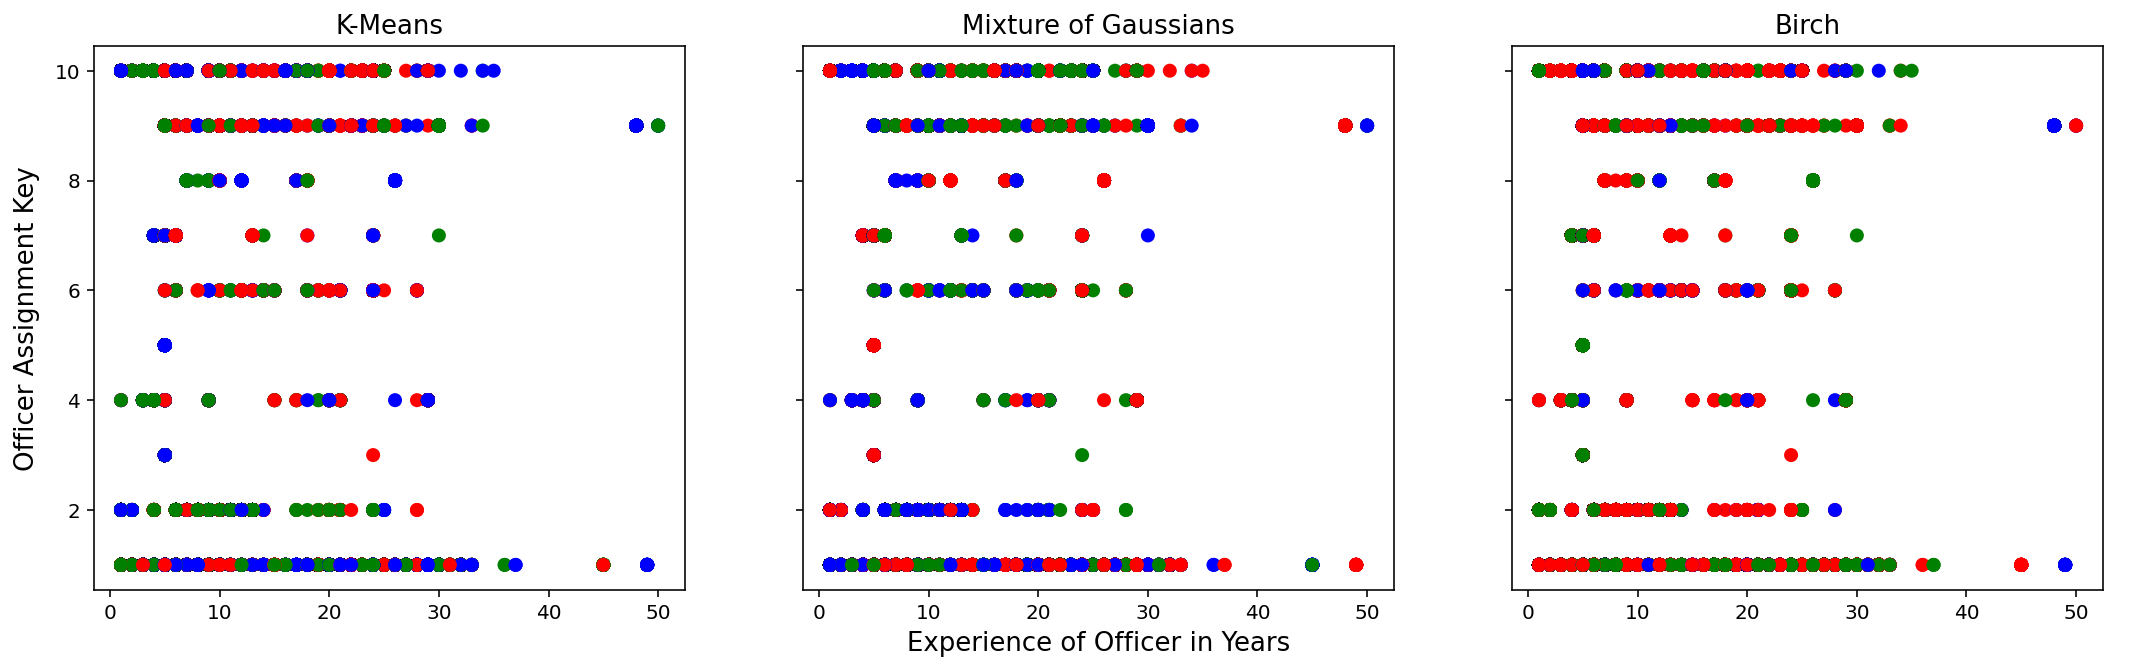

In [86]:
PlotResults(X=np.array((data.exp_years, data.officer_assignment_key)), 
            r=reduced_results, 
            num_graphs=3, 
            xaxis="Experience of Officer in Years", 
            yaxis="Officer Assignment Key")

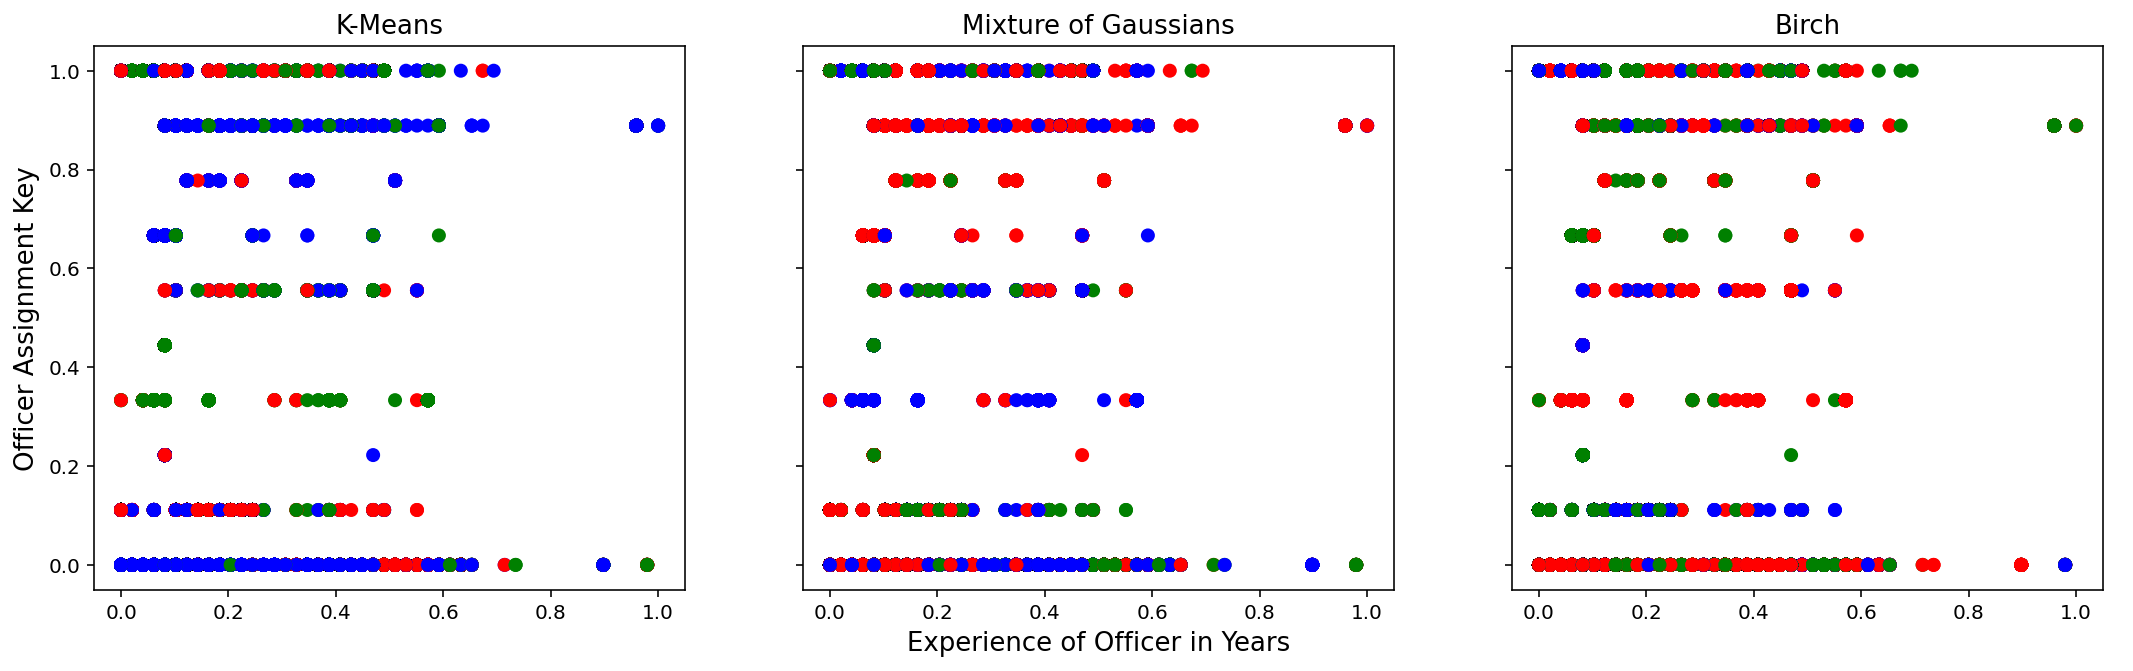

In [87]:
PlotResults(X=np.array((norm_data.exp_years, norm_data.officer_assignment_key)), 
            r=norm_reduced_results, 
            num_graphs=3, 
            xaxis="Experience of Officer in Years", 
            yaxis="Officer Assignment Key")